# 1. Problem Statement :- 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# 2. Data Gathering :-

In [335]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.neighbors import KNeighborsRegressor


from sklearn import linear_model
from sklearn.linear_model import Ridge

In [6]:
%%time
df = pd.read_csv('Train.csv')
df

CPU times: user 19 ms, sys: 6.7 ms, total: 25.7 ms
Wall time: 30.2 ms


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 3. Exploratory Data Analysis :-

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
df.shape

(8523, 12)

In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


# Replacing the null values from 'Item_Weight' & 'Outlet_Size' column.

In [20]:
# Need to check the null values and replace it by mean for 'Item_Weight' column

df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)

In [21]:
# Replacing the null values in Outlet Size column by mode.

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace = True)

# Droping columns Item_Identifier' and 'Outlet_Identifier'

In [ ]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis = 1,inplace = True)

In [25]:
df.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


# Item_Weight

In [33]:
df['Item_Weight'].value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

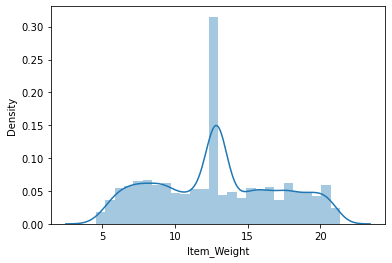

In [55]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

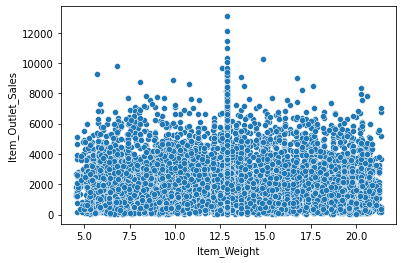

In [51]:
sns.scatterplot(x=df['Item_Weight'],y=df['Item_Outlet_Sales'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

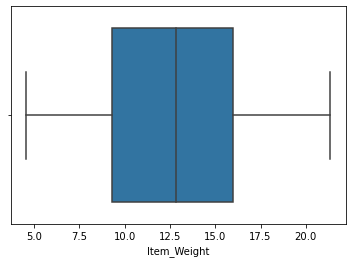

In [129]:
sns.boxplot(df['Item_Weight'])

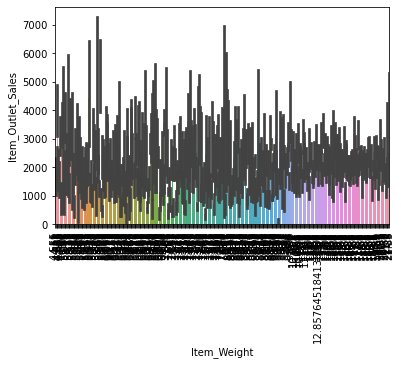

In [130]:
sns.barplot(x=df['Item_Weight'],y=df['Item_Outlet_Sales'])
plt.xticks(rotation='vertical')
plt.show()

# Item_Fat_Content

In [57]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le = LabelEncoder()

In [66]:
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 666.0+ KB


In [100]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,2,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,2,2,2,443.4228


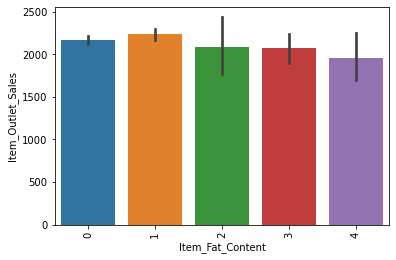

In [101]:
sns.barplot(x=df['Item_Fat_Content'],y=df['Item_Outlet_Sales'])
plt.xticks(rotation='vertical')
plt.show()

# Item_Type

In [72]:
df['Item_Type'] = le.fit_transform(df['Item_Type'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int64  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 666.0+ KB


In [111]:
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


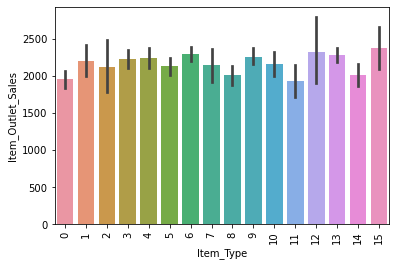

In [112]:
sns.barplot(x=df['Item_Type'],y=df['Item_Outlet_Sales'])
plt.xticks(rotation='vertical')
plt.show()

# Outlet_Establishment_Year

In [ ]:
# Create new column 'Est_Year' and drop 'Outlet_Establishment_Year'

df['Est_Year'] = 2023 - df['Outlet_Establishment_Year']

In [125]:
df['Est_Year']

0       24
1       14
2       24
3       25
4       36
        ..
8518    36
8519    21
8520    19
8521    14
8522    26
Name: Est_Year, Length: 8523, dtype: int64

In [ ]:
df.drop(['Outlet_Establishment_Year'], axis = 1, inplace = True)

In [128]:
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Est_Year
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,24
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,14
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,24
3,19.20,1,0.000000,6,182.0950,1,2,0,732.3800,25
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052,36


# Outlet_Size

In [76]:
df['Outlet_Size'].unique()

array([2, 1, 3])

In [103]:
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int64  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   int64  
 8   Outlet_Type                8523 non-null   int64  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 666.0 KB


In [107]:
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


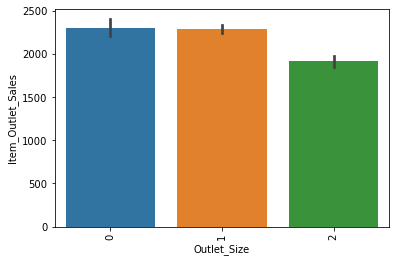

In [108]:
sns.barplot(x=df['Outlet_Size'],y=df['Item_Outlet_Sales'])
plt.xticks(rotation='vertical')
plt.show()

# Outlet_Location_Type

In [81]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [87]:
df['Outlet_Location_Type'].replace({'Tier 1':0 , 'Tier 2':1, 'Tier 3':2},inplace=True)

In [88]:
df.value_counts(['Outlet_Location_Type'])

Outlet_Location_Type
2                       3350
1                       2785
0                       2388
dtype: int64

In [90]:
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,2,0,Supermarket Type1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,2,2,Supermarket Type2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,2,0,Supermarket Type1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,2,2,Grocery Store,732.3800
4,8.93,0,0.000000,9,53.8614,1987,1,2,Supermarket Type1,994.7052


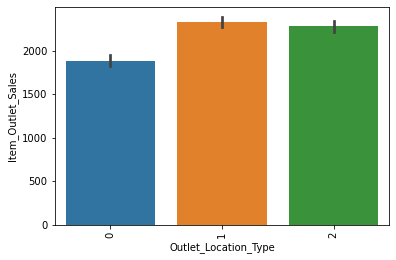

In [109]:
sns.barplot(x=df['Outlet_Location_Type'],y=df['Item_Outlet_Sales'])
plt.xticks(rotation='vertical')
plt.show()

# Outlet_Type

In [97]:
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

In [99]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,2,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,2,2,2,443.4228


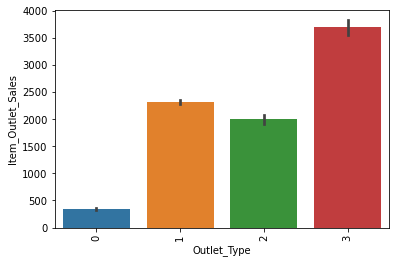

In [110]:
sns.barplot(x=df['Outlet_Type'],y=df['Item_Outlet_Sales'])
plt.xticks(rotation='vertical')
plt.show()

# Item_Outlet_Sales

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

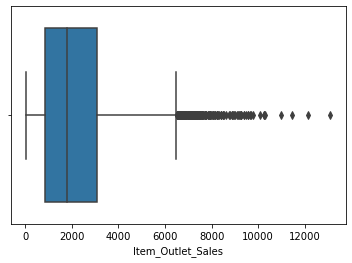

In [132]:
sns.boxplot(df['Item_Outlet_Sales'])

array([[<AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

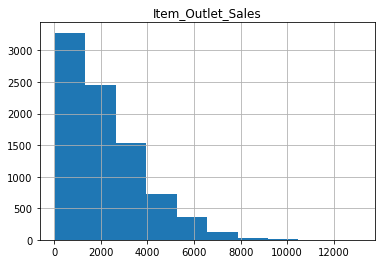

In [134]:
df.hist(['Item_Outlet_Sales'])

In [135]:
df['Item_Outlet_Sales'] = np.log(df['Item_Outlet_Sales'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

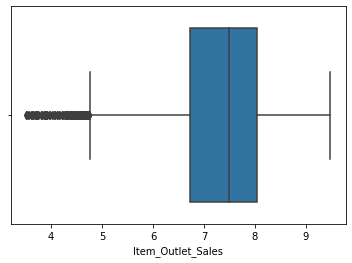

In [136]:
sns.boxplot(df['Item_Outlet_Sales'])

array([[<AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

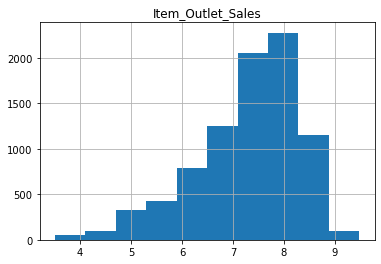

In [137]:
df.hist(['Item_Outlet_Sales'])

In [139]:
df.corr()['Item_Outlet_Sales']

Item_Weight             0.008050
Item_Fat_Content       -0.005234
Item_Visibility        -0.193064
Item_Type               0.019908
Item_MRP                0.509671
Outlet_Size            -0.123001
Outlet_Location_Type    0.058978
Outlet_Type             0.476759
Item_Outlet_Sales       1.000000
Est_Year               -0.077240
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

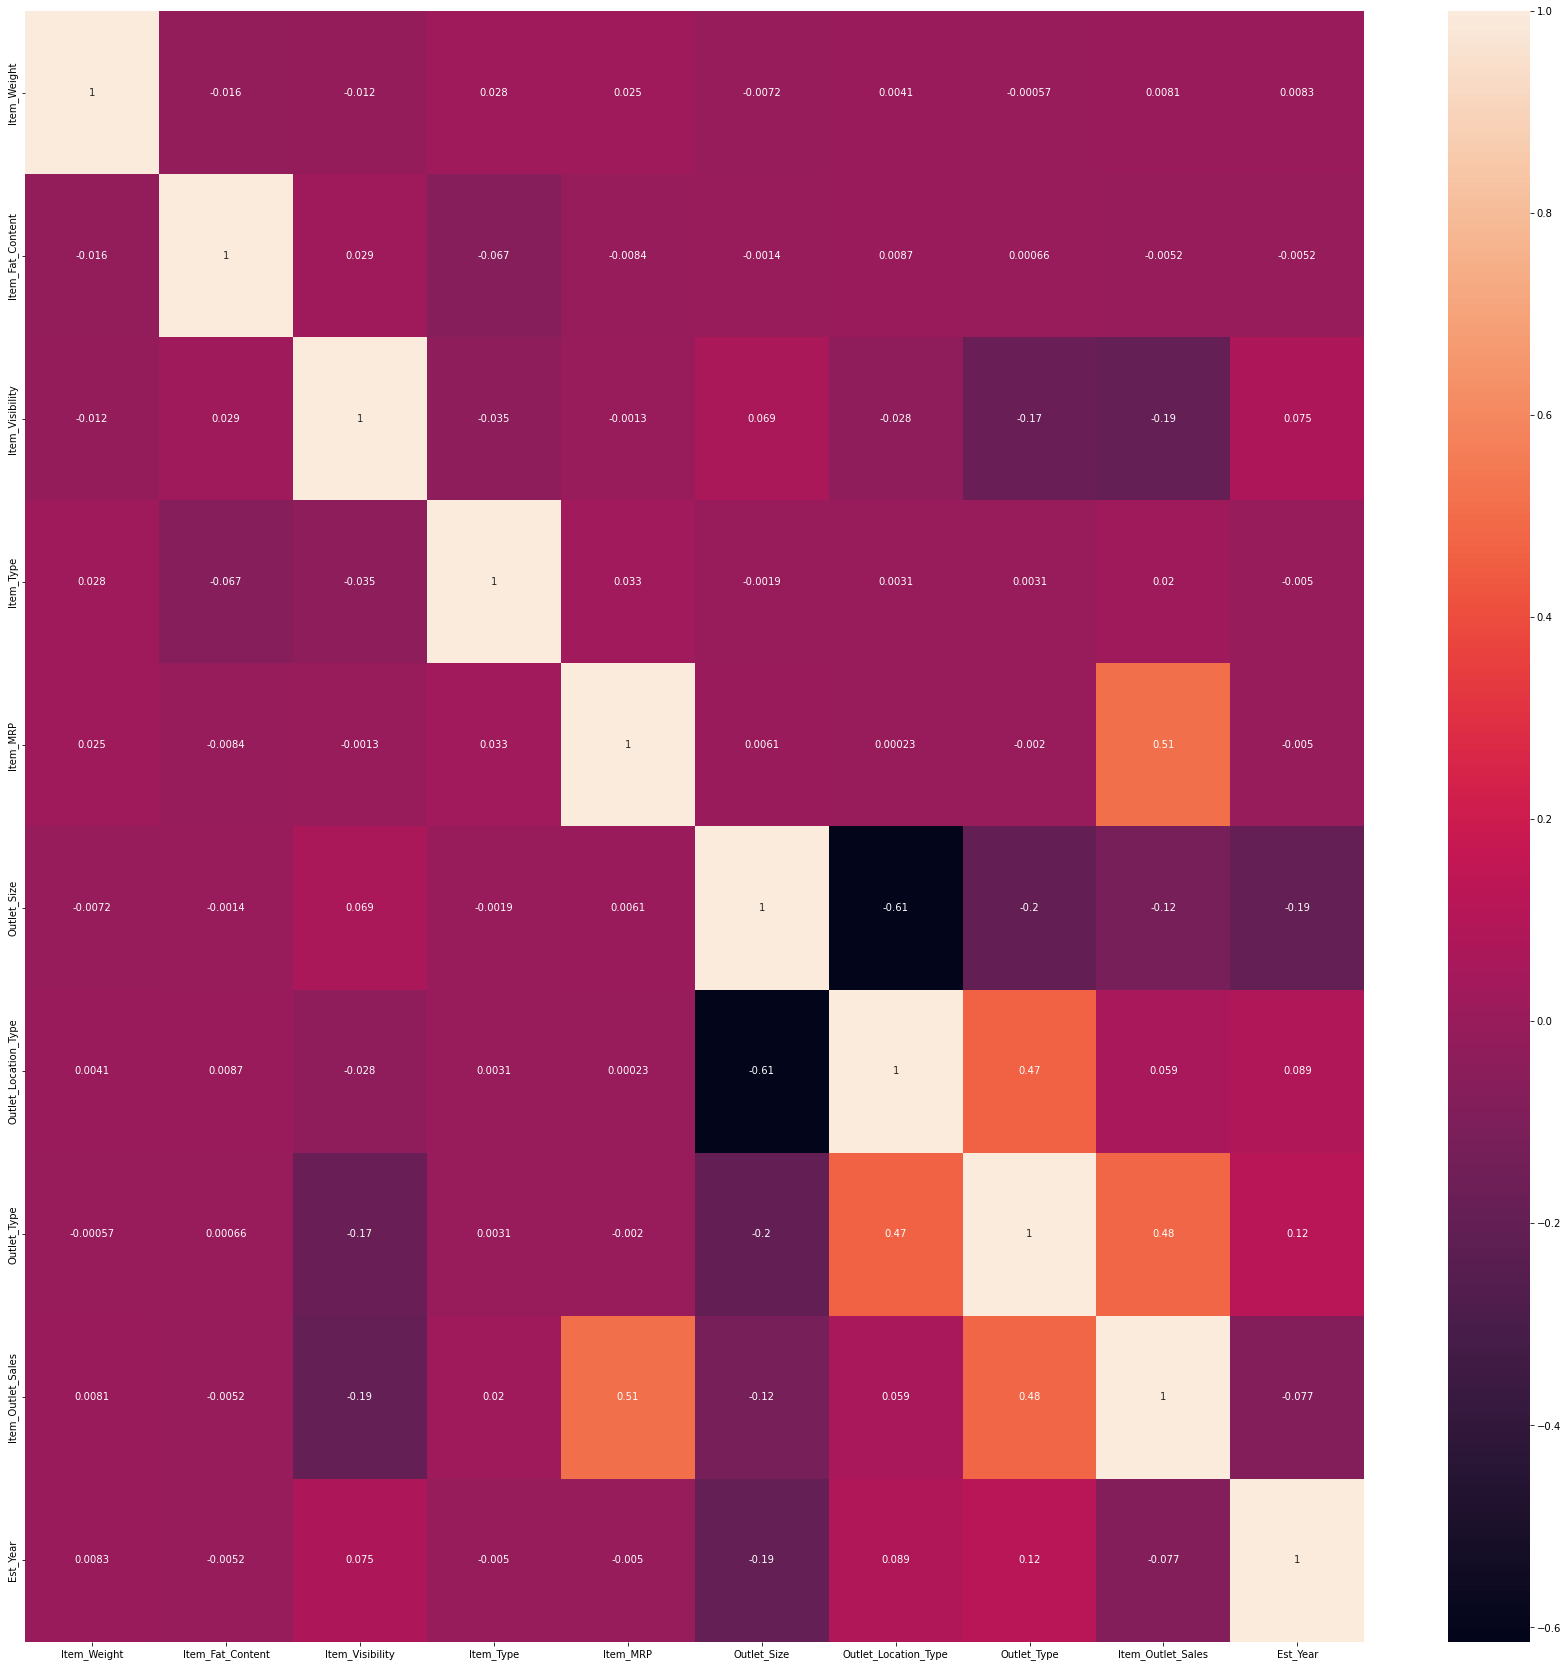

In [142]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True)

# MinMaxScaler

In [144]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [147]:
x = df.drop('Item_Outlet_Sales', axis = 1)
y = df['Item_Outlet_Sales']

In [148]:
nor_scaler = MinMaxScaler()
x_nor_df = nor_scaler.fit_transform(x)
x_df = pd.DataFrame(x_nor_df, columns = x.columns)
x_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Est_Year
0,0.282525,0.00,0.048866,0.266667,0.927507,0.5,0.0,0.333333,0.416667
1,0.081274,0.25,0.058705,0.933333,0.072068,0.5,1.0,0.666667,0.000000
2,0.770765,0.00,0.051037,0.666667,0.468288,0.5,0.0,0.333333,0.416667
3,0.871986,0.25,0.000000,0.400000,0.640093,0.5,1.0,0.000000,0.458333
4,0.260494,0.00,0.000000,0.600000,0.095805,0.0,1.0,0.333333,0.916667


# Train Test Split 

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [157]:
x_train.shape

(6818, 9)

# Linear Regression

# Train Model

In [160]:
linreg = LinearRegression()
model = linreg.fit(x_train,y_train)
model

LinearRegression()

In [168]:
y_pred = model.predict(x_test)
y_pred

array([6.49957959, 7.34568075, 7.79187517, ..., 7.32564689, 7.34020005,
       6.93773771])

In [174]:
y_test

1070    6.859363
6305    7.033381
8504    8.328116
5562    7.412870
1410    6.520792
          ...   
376     8.650889
7708    8.483094
3812    7.997035
3928    7.821144
7654    7.448779
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

# Model Evaluation

In [170]:
mse = mean_squared_error(y_test, y_pred)
mse

0.4427000568641562

In [171]:
rmse = np.sqrt(mse)
rmse

0.6653570897376507

In [172]:
mean_absolute_error(y_test, y_pred)

0.5275544545628613

In [212]:
r2_score(y_test,y_pred)

0.5999168605035133

# KNN Regression

In [288]:
from sklearn.neighbors import KNeighborsRegressor

In [289]:
knn_model = KNeighborsRegressor(n_neighbors=7, p = 2) #n_neighbors=7 value of k and p = 2 mns eucliden distance
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [290]:
y_pred = knn_model.predict(x_test)
y_pred

array([6.2982467 , 7.28973101, 7.79506207, ..., 7.93706029, 7.3153689 ,
       7.67739669])

In [291]:
mse = mean_squared_error(y_test, y_pred)
mse

0.561155576105388

In [292]:
rmse = np.sqrt(mse)
rmse

0.7491031812143024

In [293]:
mean_absolute_error(y_test, y_pred)

0.5712155887476872

In [294]:
r2_score(y_test,y_pred)

0.4928643519036702

# Hyperparameter tunning


This wiil use to find the value of K 

By this hyperparameter tunning machine takes the value of k by range 1 to 20

In prevoius cells 38 we take k value manually that is k_neighbours = 7

In [282]:
k = np.arange(2,20)  
p = [1,2]
hyp = {'n_neighbors' : k,
      'p' : p}

In [283]:
knn = KNeighborsRegressor()
best_model = GridSearchCV(knn, hyp, cv = 5)
best_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'p': [1, 2]})

In [284]:
best_model.best_params_

{'n_neighbors': 8, 'p': 1}

In [285]:
knn_model = KNeighborsRegressor(n_neighbors=20, p = 2)
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [286]:
y_pred = knn_model.predict(x_test)
y_pred

array([6.11755948, 7.15788548, 7.65512673, ..., 7.70236491, 6.78970486,
       7.713292  ])

In [287]:
r2_score(y_test,y_pred)

0.4324727175686395

# Ridge and Lasso Regressor

In [375]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

In [199]:
R=Ridge(alpha= 0.001)
R.fit(x_train,y_train)

Ridge(alpha=0.001)

In [200]:
y_pred = R.predict(x_test)

In [214]:
mse = mean_squared_error(y_test, y_pred)
mse

0.442699868323116

In [215]:
rmse = np.sqrt(mse)
rmse

0.6653569480535362

In [216]:
mean_absolute_error(y_test, y_pred)

0.5275544934485876

In [217]:
r2_score(y_test,y_pred)

0.5999168605035133

# Lasso Regressor

In [376]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

In [391]:
l = Lasso(alpha = 0.001)

In [392]:
l.fit(x_train,y_train)

Lasso(alpha=0.001)

In [393]:
y_pred = l.predict(x_test)

In [394]:
mse = mean_squared_error(y_test, y_pred)
mse

1.6828719284747764

In [395]:
rmse = np.sqrt(mse)
rmse

1.2972555370761678

In [396]:
mean_absolute_error(y_test, y_pred)

1.0286405296500711

In [397]:
r2_score(y_test,y_pred)

-0.5945576583946812

# Random Forest

In [296]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [297]:
rf_reg = RandomForestRegressor(random_state = 10)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [298]:
y_pred = rf_reg.predict(x_test)

In [299]:
mse = mean_squared_error(y_test,y_pred)
mse

0.32089181630654273

In [300]:
rmse = np.sqrt(mse)
rmse

0.5664731382038717

In [301]:
r2_score(y_test,y_pred)

0.7099989982085391

# XG BOOSt

In [352]:
pip install xgboost


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [353]:
from xgboost import XGBRegressor 

In [354]:
from sklearn.model_selection import train_test_split
x_train,x_text,y_train,y_test = train_test_split(x,y,test_size= 0.2,train_size=0.8,random_state = 42)

In [355]:
model = XGBRegressor()

In [356]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [357]:
y_pred= model.predict(x_test)

In [358]:
y_pred

array([6.4064736, 7.046212 , 8.174981 , ..., 7.9345746, 7.5618687,
       7.7990537], dtype=float32)

In [359]:
from sklearn.metrics import mean_squared_error

In [360]:
mse = mean_squared_error(y_test , y_pred)
mse

1.916512548695427

In [361]:
rmse = np.sqrt(mse)
rmse

1.3843816484970564

In [362]:
R2 = r2_score(y_test,y_pred)
R2

-0.8159372143675327

In [363]:
from sklearn.model_selection import cross_val_score
val = XGBRegressor(objective = 'reg:squarederror')

In [364]:
scores = cross_val_score(val , x,y,
                        scoring = 'neg_mean_squared_error',
                        cv = 10)

In [365]:
scores

array([-0.32565935, -0.31719233, -0.33391321, -0.29218698, -0.3075497 ,
       -0.28775445, -0.30431015, -0.3352088 , -0.27241322, -0.31928929])

In [366]:
rmse = np.sqrt(-scores)

In [367]:
rmse

array([0.57066571, 0.5631983 , 0.57785224, 0.54054322, 0.55457164,
       0.53642749, 0.55164313, 0.57897219, 0.5219322 , 0.56505689])

In [372]:
R_score = r2_score(y_test,y_pred)
R_score

-0.8159372143675327

In [374]:
-(R_score)

0.8159372143675327

In [398]:
import pickle

In [399]:
model = pickle.dump(model,open('model.pkl','wb'))